In [1]:
import random as rng, numpy as np, time, pickle
from scipy.optimize import curve_fit 
from matplotlib import pyplot as plt
from tqdm import tqdm
from matplotlib.ticker import MaxNLocator
from scipy.special import kn

plt.rcParams['figure.figsize'] = [10, 10]

In [13]:
g_energy, energy, computed_flux = np.loadtxt("pPb_lhc.txt", usecols=(1,2,3), unpack=True)

In [16]:
scaled_flux = []
for i in range(len(energy)):
    scaled_flux.append(computed_flux[i] g_energy[i])

(-10.0, 600.0)

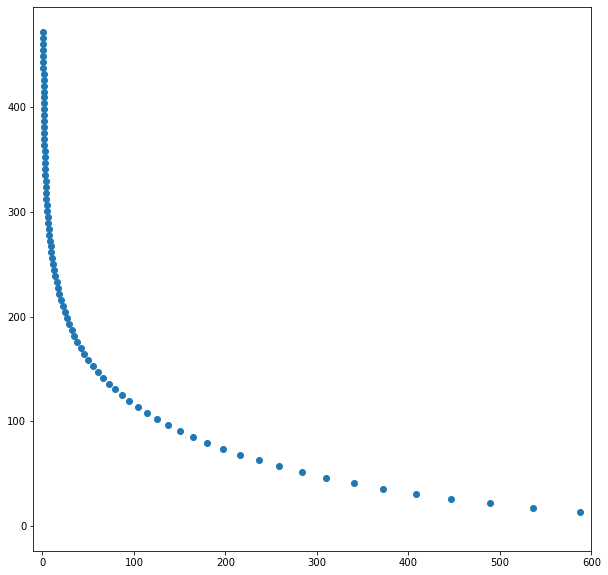

In [18]:
plt.scatter(energy, computed_flux)
#plt.scatter(energy, scaled_flux)
plt.xlim(-10,600)
#plt.xscale("log")
#plt.yscale("log")

Now let's try plotting $n_A (w)$

In [5]:
#First Define Constants in spectrum formula
Z = 82
aem = 1/137
gamma = 1570
v = np.sqrt((gamma**2 -1) / gamma**2)
Ra = (1.2 * 10**(-15)) * (207)**(1/3)
bmin = 2 * Ra

In [6]:
def photon_spectrum(w):
    zeta = (w * bmin) / (gamma * v)
    return ((2 * aem * Z**2) / np.pi) * (zeta * kn(0, zeta) * kn(1, zeta) - (zeta**2 / 2) * (kn(1, zeta)**2 - kn(0, zeta)**2))

In [7]:
spectrum = []
for i in energy:
    spectrum.append(photon_spectrum(i))

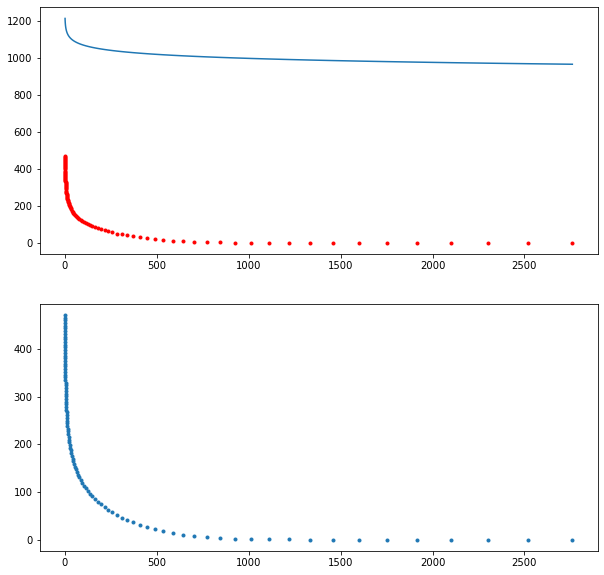

In [19]:
figure, axis = plt.subplots(2,1)
axis[0].plot(energy, spectrum)
axis[0].plot(energy, computed_flux,"r.")
axis[1].plot(energy, computed_flux, ".")
#plt.plot(energy, computed_flux, ".")